# INSY 669: Text Analytics Group Project 1 

#### Group  Members:
1. Jawad Toufaili (260973357)
2. Sebastian Salazar (260983868)
3. Shivangi Soni (260994072)
4. Vivek Saahil (260965637)

<hr style="border:1.5px solid black"> </hr>

This notebook shows the analysis conducted on around 10,000 comments posted on Edmunds Mid-Size Sedan forum to determine top 10 brands by frequency and the most frequently mentioned attributes for these cars. Furthermore, analysis is done to see which attributes are associated with the top 5 brand names in the forum. Additional analysis is conducted to determine the most aspirational brand. The report also outlines the business insights derived from these results and how the companies can leverage this analysis to determine areas of improvement for business growth.

Forum Link: https://forums.edmunds.com/discussion/7526/general/x/midsize-sedans-2-0

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import nltk
#nltk.download()
from nltk.tokenize import sent_tokenize, word_tokenize
import string

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn import manifold

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
df=pd.read_csv(r"C:\Users\vivek\Desktop\edmunds_extraction (2).csv")
models=pd.read_csv(r"C:\Users\vivek\Desktop\models_sanitized.csv", header = None)
models=models.rename(columns={0:'Brand', 1:'Model'})

###  Data cleaning

Lowercasing brands and models database 

In [3]:
for i in range(len(models)):
    models['Brand'][i]=models['Brand'][i].lower()
    models['Model'][i]=models['Model'][i].lower()
    
models=models.drop_duplicates()

First we tokenize the comments into a string list

In [4]:
word_comments=[]

# Tokenize
for i in range(len(df)):
    word_comments.append(word_tokenize(df['Comment'][i].lower()))
df['comment_clean']=word_comments

Then, we will filter away from the comments words that are not neccesary or punctuations.

In [5]:
stopwords = set(nltk.corpus.stopwords.words('english'))
punctuation = set(string.punctuation)

# Filter words in stopwords
word_comments_filt=[]
for i in range(len(df)):
    filt=[]
    for word in df['comment_clean'][i]:
        if word not in stopwords:
            filt.append(word) 
    word_comments_filt.append(filt)
df['comment_clean']=word_comments_filt

# Filter punctuation words
word_comments_filt=[]
for i in range(len(df)):
    filt=[]
    for word in df['comment_clean'][i]:
        if word not in punctuation:
            filt.append(word) 
    word_comments_filt.append(filt)
df['comment_clean']=word_comments_filt

### Calculating word frequency

In [6]:
word_comments=[]

for i in range(len(df)):
    word_comments.append(nltk.FreqDist(df['comment_clean'][i]))
    
df['comment_wordcount']=word_comments
df

,Counter,Date,User,Comment,comment_clean,comment_wordcount
0,1,2007-04-11 18:52:00,motownusa,Hi Pat:You forgot the Chrysler Sebring,"[hi, pat, forgot, chrysler, sebring]","{'hi': 1, 'pat': 1, 'forgot': 1, 'chrysler': 1..."
1,2,2007-04-11 19:33:00,exshoman,I'm sure some folks would appreciate having th...,"['m, sure, folks, would, appreciate, malibu, i...","{''m': 1, 'sure': 1, 'folks': 1, 'would': 1, '..."
2,3,2007-04-12 06:51:00,targettuning,You can try to revive this topic but without b...,"[try, revive, topic, without, able, discuss, h...","{'try': 1, 'revive': 1, 'topic': 1, 'without':..."
3,4,2007-04-12 08:43:00,pat,Model vs. model is exactly what we're here for...,"[model, vs., model, exactly, 're, manufacturer...","{'model': 2, 'vs.': 2, 'exactly': 1, ''re': 1,..."
4,5,2007-04-13 11:49:00,perna,The Altima is my favorite of the bunch. It is ...,"[altima, favorite, bunch, amongst, fastest, be...","{'altima': 2, 'favorite': 1, 'bunch': 2, 'amon..."
...,...,...,...,...,...,...
9988,9996,2008-07-24 09:06:00,igozoomzoom,It's quite possible that the 2010 Fusion/Milan...,"['s, quite, possible, 2010, fusion/milan, new,...","{''s': 5, 'quite': 1, 'possible': 1, '2010': 2..."
9989,9997,2008-07-24 09:07:00,moocow1,Of course plans don't mean reality. I expect a...,"[course, plans, n't, mean, reality, expect, le...","{'course': 2, 'plans': 2, 'n't': 1, 'mean': 1,..."
9990,9998,2008-07-24 09:27:00,akirby,"These aren't ""plans"" - the cars hit the factor...","[n't, ``, plans, '', cars, hit, factory, floor...","{'n't': 1, '``': 2, 'plans': 1, '''': 2, 'cars..."
9991,9999,2008-07-24 09:33:00,thegraduate,"In my head, a nameplate's sales are a nameplat...","[head, nameplate, 's, sales, nameplate, 's, sa...","{'head': 1, 'nameplate': 2, ''s': 2, 'sales': ..."


# Task A

###  Identify top 10 brands by frequency

In [7]:
df_a=df.copy()

Create a count column per brand, it will initially be empty

In [8]:
brands=models['Brand'].unique()

for brand in brands:
    df_a[brand]=0

Define how many times the brand is mentioned in the comment

In [9]:
for i in range(len(df_a)):
    for word in df_a['comment_wordcount'][i]:
        if word in brands:
            df_a[word][i]=df_a['comment_wordcount'][i][word]

Create a dictionary of models per brand and add their mentions to their respective brands

In [10]:
model_brands={}
for model in models['Model'].tolist():
    model_brands[model]=models[models['Model']==model]['Brand'].to_list()[0]

for i in range(len(df_a)):
    for word in df_a['comment_wordcount'][i]:
        if word in models['Model'].tolist():
            df_a[model_brands[word]][i]=df_a[model_brands[word]][i]+df_a['comment_wordcount'][i][word]   

In [11]:
df_a[brands]

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,3,...,0,0,3,0,1,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,0,0,0,0,2,0,0,3,4,...,0,0,0,0,0,0,0,2,0,0
9989,0,0,0,0,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
9991,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0


Finally, we adjust the brands mentions to only count one per comment

In [12]:
for brand in brands:
    for i in range(len(df_a)):
        if df_a[brand][i]>0:
            df_a[brand][i]=1
df_a[brands]

,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,honda,...,mercury,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
9989,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9991,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Top ten brands

In [13]:
top10brands={}

for brand in brands :
    top10brands[brand]=df_a[brand].sum()
    
top10brands=pd.DataFrame.from_dict(top10brands, orient='index',columns=['Count'])
top_brands=(top10brands.sort_values(by=['Count'], ascending=False).head(10)).index.to_list()

print('The following brands are the TOP10 most mentioned in the forum:')
display(top10brands.sort_values(by=['Count'], ascending=False).head(10))

The following brands are the TOP10 most mentioned in the forum:


,Count
honda,3893
ford,2148
toyota,2010
hyundai,1352
mazda,1232
nissan,998
chevrolet,746
chrysler,514
saturn,491
subaru,291


###  Calculate lift ratios

First we define a function to calculate lift. This is an function that iterates around the brand mentions

In [14]:
def calculate_lift(a, b, data):
    count_a = 0
    count_b = 0
    count_a_b = 0
    n = len(data)
    
    if a==b:
        return float(1)
    
    for i in range(n):
        if data[a][i]==1:
            count_a += 1
        if data[b][i]==1:
            count_b += 1
        if data[a][i]==1 and data[b][i]==1:
            count_a_b += 1
    if count_a == 0:
        return (float(n)*count_a_b)/(count_b)
    elif count_b == 0:
        return (float(n)*count_a_b)/(count_a)
    else:
        return (float(n)*count_a_b)/(count_a*count_b)

Calculate lift for top 10 brands

In [15]:
lift={}

for brand_a in top_brands:
    for brand_b in top_brands:
        lift[brand_a,brand_b]=calculate_lift(brand_a,brand_b,df_a)

Create lift matrix

In [16]:
lift_matrix=pd.DataFrame(index=top_brands, columns=top_brands)

for a in top_brands:
    for b in top_brands:
        lift_matrix[b][a]=lift[a,b]

lift_matrix

,honda,ford,toyota,hyundai,mazda,nissan,chevrolet,chrysler,saturn,subaru
honda,1.0,1.187855,1.734264,1.420157,1.131359,1.592105,1.496794,1.433277,1.495189,1.561319
ford,1.187855,1.0,1.481309,1.156177,1.302777,1.337867,1.396918,1.411962,1.459153,1.071133
toyota,1.734264,1.481309,1.0,1.798175,1.101671,2.396152,2.185923,1.479886,2.055485,1.264266
hyundai,1.420157,1.156177,1.798175,1.0,1.079894,1.91077,1.783417,1.624929,1.505351,1.549373
mazda,1.131359,1.302777,1.101671,1.079894,1.0,1.536089,0.945944,0.804808,1.040745,2.703734
nissan,1.592105,1.337867,2.396152,1.91077,1.536089,1.0,2.2281,1.32468,2.793859,2.202178
chevrolet,1.496794,1.396918,2.185923,1.783417,0.945944,2.2281,1.0,1.667915,4.938035,1.703201
chrysler,1.433277,1.411962,1.479886,1.624929,0.804808,1.32468,1.667915,1.0,1.306668,1.336195
saturn,1.495189,1.459153,2.055485,1.505351,1.040745,2.793859,4.938035,1.306668,1.0,1.888362
subaru,1.561319,1.071133,1.264266,1.549373,2.703734,2.202178,1.703201,1.336195,1.888362,1.0


###  Plot MDS

Calculate dissimilarity matrix

In [17]:
dissimilarity_matrix = 1/lift_matrix

Plot MDS

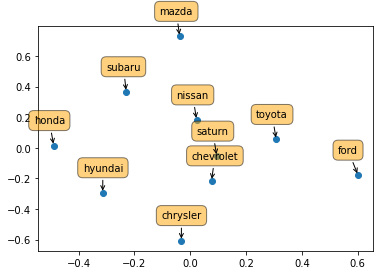

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn import manifold

seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(lift_matrix, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points',ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'orange', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

# Task B

### What insights can you offer brand managers from your analysis in Task A? Choose two brands that you can offer the most interesting/useful insights for. 

In this dataset we chose, the main target behind peoples posts is to discuss mid-sized sedans. The distance between the car brands measures the dissimilarity between them, and the closer brands are, meaning that people associate them to each other. 

As we can see, Mazda is quite far away meaning that people don't associate it to other car brands. As a brand manager, you would want to focus on Mazda so to raise its competitiveness versus other cars. When compared to Subaru, Mazda provides above its weight, a classy interior, much improved driving manners, and perhaps above all, optional all-wheel drive, which is something Subaru lacks. Also, when compared compared to Nissan, Mazda is has very similar characteristics but is less expensive. This can be used to attract Nissan users towards a more economy friendly car. An interest additional insight is that Mazda can try to attract Saturn previous users, which stopped production in 2009 and made very similar cars to Mazda.

Now another brand to focus on can be Chevrolet. Chevrolet competes closely with Saturn, and both are American brands. However, as mentioned earlier, Saturn stopped manufacturing so Chevrolet can try attract Saturn's previous user as the transition will be very smooth. Chevrolet also competes closely with Japanese manufactured cars such as Nissan and Toyota, have very similar specs. This can also be used by customers of these brands based in the US, to support a local manufacturing company.

# Task C

### Identifying the top 5 attributes and determining which brands among the top 5 they are mostly associated with

First substituting models as brands and making sure each word is counted once per post 


In [19]:
df_a["comments_unique"] = df_a["comment_clean"].apply(lambda list_of_words: [x if x not in model_brands else model_brands[x] for x in list_of_words])
df_a["comments_unique"] = df_a["comments_unique"].apply(lambda x: sorted(set(x)))
df_a

,Counter,Date,User,Comment,comment_clean,comment_wordcount,acura,audi,bmw,buick,...,mitsubishi,nissan,pontiac,saturn,subaru,suzuki,toyota,volkswagen,volvo,comments_unique
0,1,2007-04-11 18:52:00,motownusa,Hi Pat:You forgot the Chrysler Sebring,"[hi, pat, forgot, chrysler, sebring]","{'hi': 1, 'pat': 1, 'forgot': 1, 'chrysler': 1...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[chrysler, forgot, hi, pat]"
1,2,2007-04-11 19:33:00,exshoman,I'm sure some folks would appreciate having th...,"['m, sure, folks, would, appreciate, malibu, i...","{''m': 1, 'sure': 1, 'folks': 1, 'would': 1, '...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['m, appreciate, chevrolet, folks, included, s..."
2,3,2007-04-12 06:51:00,targettuning,You can try to revive this topic but without b...,"[try, revive, topic, without, able, discuss, h...","{'try': 1, 'revive': 1, 'topic': 1, 'without':...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[able, agree, comparisons, discuss, discussion..."
3,4,2007-04-12 08:43:00,pat,Model vs. model is exactly what we're here for...,"[model, vs., model, exactly, 're, manufacturer...","{'model': 2, 'vs.': 2, 'exactly': 1, ''re': 1,...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['re, 's, 've, already, around, auto, avoid, b..."
4,5,2007-04-13 11:49:00,perna,The Altima is my favorite of the bunch. It is ...,"[altima, favorite, bunch, amongst, fastest, be...","{'altima': 2, 'favorite': 1, 'bunch': 2, 'amon...",0,0,0,0,...,0,1,0,1,0,0,1,0,0,"['ll, 's, 've, 2002, 2007, 2007., advice, also..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,9996,2008-07-24 09:06:00,igozoomzoom,It's quite possible that the 2010 Fusion/Milan...,"['s, quite, possible, 2010, fusion/milan, new,...","{''s': 5, 'quite': 1, 'possible': 1, '2010': 2...",0,0,0,0,...,0,0,0,0,0,0,1,0,0,"['', '09, 'm, 's, ..., .the, 2.5l, 200, 2010, ..."
9989,9997,2008-07-24 09:07:00,moocow1,Of course plans don't mean reality. I expect a...,"[course, plans, n't, mean, reality, expect, le...","{'course': 2, 'plans': 2, 'n't': 1, 'mean': 1,...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['m, 're, 1mpg, 20-22, 23/33, 25/35, 30-32, 6,..."
9990,9998,2008-07-24 09:27:00,akirby,"These aren't ""plans"" - the cars hit the factor...","[n't, ``, plans, '', cars, hit, factory, floor...","{'n't': 1, '``': 2, 'plans': 1, '''': 2, 'cars...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['', 'll, 's, 4, 6, ``, achieve, advantage, an..."
9991,9999,2008-07-24 09:33:00,thegraduate,"In my head, a nameplate's sales are a nameplat...","[head, nameplate, 's, sales, nameplate, 's, sa...","{'head': 1, 'nameplate': 2, ''s': 2, 'sales': ...",0,0,0,0,...,0,0,0,0,0,0,1,0,0,"['s, calls, choice, different, everyone, head,..."


Obtaining a list of possible attributes (by filtering out adjectives and nouns to reduce the computation time). The filtering part is to get a high level overview of the attributes that are mentioned in the comments 

In [20]:
#Obtain POS for the tokens
df2 = df_a[['Counter', 'Date', 'User', 'Comment','comment_clean', 'comments_unique']]
df2['pos']=df2['comments_unique'].apply(nltk.tag.pos_tag)
    
# Extract the list of nouns since the attributes will be nouns and adjectives; this will help in reducing the amount of words that needs to be filtered 
df2.loc[:,'nouns_adj']=df2['pos'].apply(lambda pos_list: [x[0] for x in pos_list if x[1] == 'NN'or x[1] == 'JJR'or x[1]== 'JJS'])


 Geting the frequencies for the nouns and adjectives 

In [21]:
#creating list of unique nouns and adjectives 
noun_adj_df = df2['nouns_adj'].apply(pd.Series)
noun_adj_list = noun_adj_df.stack().unique()

# get the frequencies for the nouns and adjectives:
noun_adj_df= pd.DataFrame(noun_adj_list)
noun_adj_df.columns=['nouns_adj']

# join the above table with frequency table

## get frequency of all words
all_words = df2['comments_unique'].sum()
freq_dist_words = nltk.FreqDist(all_words)

dfwords_dist=pd.DataFrame(list(freq_dist_words.items()), columns=['word', 'frequency'])
noun_freq_df = pd.merge(noun_adj_df, dfwords_dist, right_on='word', left_on='nouns_adj')
noun_freq_df = noun_freq_df.sort_values(by=['frequency'], ascending = False)
noun_freq_df

,nouns_adj,word,frequency
25,honda,honda,3893
19,car,car,3648
2821,like,like,2726
1653,one,one,2378
108,think,think,2172
...,...,...,...
8383,fury,fury,1
8382,applique,applique,1
4316,snatch,snatch,1
4317,you.dumb,you.dumb,1


Some of the attributes that can be clubbed together under synonyms. The approach is to make a csv file of attributes similar to the models ones so that the attributes can be clubbed together and their frequency can be calculated. 

In [22]:
attr_list = ['engine','year','price', 'power', 'drive',"value", "year","mileage"
             ,"quality","reliability","cost" ,"warranty","mpg","speed","hp" ,"control"
             ,"gm","mph","performance","size","auto" ,"design" ,"transmission","brand"
             ,"seat","wheel" ,"room","use" ,"experience" ,"cylinder","midsize","feel" ,"rpm"
             ,"safety","torque","door","maintenance" ,"volume","area","manufacturer","acceleration","style"
             ,"space","motor","stability" ,"range","rating" ,"diesel" ,"oil" ,"body","interior "
             ,"weight","noise","leather","type" ,"cyl","sport","comfort" ,"rate","make","capacity" 
             ,"limit","rwd","gear","luxury","pricing","age","navigation","wood","mile"
             ,"average","exhaust","foot","slip","liter","tank","beat","gasoline","color","trim"
             ,"conditions" ,"rpms","gallon","shape","styling","efficiency","legroom","horsepower","durability"
             ,"headroom","audio","aluminium","metal","lbs","steel","apperance","drivetrain","efficient","longetivity","material"
             ,"expense","moonroof", "bigger", "biggest", "smaller", "smallest", "economy", ]
attributes = pd.read_csv(r"C:\Users\vivek\Desktop\attributes.csv")
brand_att={}
for att in attributes['Words'].tolist():
    brand_att[att]=attributes[attributes['Words']==att]['Attribute'].to_list()[0]

print(attributes)

       Words    Attribute
0     engine  performance
1       year        model
2      price        price
3      power  performance
4      drive        price
..       ...          ...
89   biggest         size
90   smaller         size
91  smallest         size
92     money       price 
93   economy  performance

[94 rows x 2 columns]


Substituting attributes under their synonyms and that each word is counted once per post 

In [23]:
df2['comments_attr'] = df2['comments_unique'].apply(lambda list_of_att: [x if x not in brand_att else  brand_att[x] for x in list_of_att])
df2['comments_attr'] = df2['comments_attr'].apply(lambda x: sorted(set(x)))
df2

,Counter,Date,User,Comment,comment_clean,comments_unique,pos,nouns_adj,comments_attr
0,1,2007-04-11 18:52:00,motownusa,Hi Pat:You forgot the Chrysler Sebring,"[hi, pat, forgot, chrysler, sebring]","[chrysler, forgot, hi, pat]","[(chrysler, NN), (forgot, VBD), (hi, JJ), (pat...","[chrysler, pat]","[chrysler, forgot, hi, pat]"
1,2,2007-04-11 19:33:00,exshoman,I'm sure some folks would appreciate having th...,"['m, sure, folks, would, appreciate, malibu, i...","['m, appreciate, chevrolet, folks, included, s...","[('m, VBP), (appreciate, JJ), (chevrolet, NN),...",[chevrolet],"['m, appreciate, chevrolet, folks, included, s..."
2,3,2007-04-12 06:51:00,targettuning,You can try to revive this topic but without b...,"[try, revive, topic, without, able, discuss, h...","[able, agree, comparisons, discuss, discussion...","[(able, JJ), (agree, JJ), (comparisons, NNS), ...","[discussion, gets..or, manufacturer, spite, ta...","[able, agree, comparisons, discuss, discussion..."
3,4,2007-04-12 08:43:00,pat,Model vs. model is exactly what we're here for...,"[model, vs., model, exactly, 're, manufacturer...","['re, 's, 've, already, around, auto, avoid, b...","[('re, VBP), ('s, POS), ('ve, VBP), (already, ...","[auto, discussion, exclusion, manufacturer, ne...","['re, 's, 've, already, around, auto, avoid, b..."
4,5,2007-04-13 11:49:00,perna,The Altima is my favorite of the bunch. It is ...,"[altima, favorite, bunch, amongst, fastest, be...","['ll, 's, 've, 2002, 2007, 2007., advice, also...","[('ll, MD), ('s, POS), ('ve, VBP), (2002, CD),...","[advice, best, bunch, car, choice, comment, fa...","['ll, 's, 've, 2002, 2007, 2007., advice, also..."
...,...,...,...,...,...,...,...,...,...
9988,9996,2008-07-24 09:06:00,igozoomzoom,It's quite possible that the 2010 Fusion/Milan...,"['s, quite, possible, 2010, fusion/milan, new,...","['', '09, 'm, 's, ..., .the, 2.5l, 200, 2010, ...","[('', ''), ('09, VBZ), ('m, VBP), ('s, POS), (...","[balance, beat, better, camcord, case, chevrol...","['', '09, 'm, 's, ..., .the, 2.5l, 200, 2010, ..."
9989,9997,2008-07-24 09:07:00,moocow1,Of course plans don't mean reality. I expect a...,"[course, plans, n't, mean, reality, expect, le...","['m, 're, 1mpg, 20-22, 23/33, 25/35, 30-32, 6,...","[('m, VBP), ('re, VBP), (1mpg, CD), (20-22, JJ...","[advantage, best, course, economy, fuel, highw...","['m, 're, 1mpg, 20-22, 23/33, 25/35, 30-32, 6,..."
9990,9998,2008-07-24 09:27:00,akirby,"These aren't ""plans"" - the cars hit the factor...","[n't, ``, plans, '', cars, hit, factory, floor...","['', 'll, 's, 4, 6, ``, achieve, advantage, an...","[('', ''), ('ll, MD), ('s, POS), (4, CD), (6, ...","[advantage, anything, better, class, company, ...","['', 'll, 's, 4, 6, ``, achieve, advantage, an..."
9991,9999,2008-07-24 09:33:00,thegraduate,"In my head, a nameplate's sales are a nameplat...","[head, nameplate, 's, sales, nameplate, 's, sa...","['s, calls, choice, different, everyone, head,...","[('s, POS), (calls, NNS), (choice, NN), (diffe...","[choice, everyone, head, honda, hyundai, intend]","['s, calls, choice, different, everyone, head,..."


### Top 5 attributes based on their frequency

In [24]:
all_attributes = attributes['Attribute'].unique()
def calc_frequency(comments,word_list):
    freq_word=0
    for i in comments:
        if word_list in i:
            freq_word += 1
    return freq_word
  
# Calculate freq for attr
df_top_attribute = pd.DataFrame(columns=['attribute','frequency'])
for i,attribute in enumerate(all_attributes):
        temp_frequency =calc_frequency( df2.comments_attr,str(attribute))
        df_top_attribute.loc[i]=[str(attribute),temp_frequency]

df_top5_attribute = df_top_attribute.sort_values(by='frequency',ascending=False).head(7)
df_top5_attribute.drop([1,10])

,attribute,frequency
0,performance,2649
2,price,2064
11,interior,1373
7,size,1211
8,transmission,841


In [25]:
top5_attr = ['performance', 'price', 'interior','size','transmission']

### Lift ratio between brands and attributes

Calculating Lift between brands and attributes and generating lift matrix 

In [26]:
##calculating lift 
def calc_lift(a, b,comments):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(comments)
    if a==b:
        return 1
    for i in comments:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)
    
# Grouped Brands and attribute lifts 
top_5brands = (top10brands.sort_values(by=['Count'], ascending=False).head(5)).index.to_list()
df_lift_brand_attr=pd.DataFrame(columns=['brand','attribute','lift'])
i=0
for brand in top_5brands:
    for attr in top5_attr:
        temp_lift=calc_lift(str(brand), str(attr),df2.comments_attr)
        df_lift_brand_attr.loc[i]=[ str(brand),str(attr),temp_lift]
        i=i+1
        
df3 = df_lift_brand_attr.sort_values('lift',ascending = False).groupby('brand').head(10)

lift_matrix_attr_brand = df3.pivot(index='brand', columns='attribute')
print(lift_matrix_attr_brand)

               lift                                             
attribute  interior performance     price      size transmission
brand                                                           
ford       1.067337    1.331217  1.113471  1.102553     1.183803
honda      1.336740    1.203514  1.294650  1.388381     1.373498
hyundai    1.588074    1.040749  1.561335  1.391586     0.790980
mazda      1.518266    1.417700  1.402955  1.681182     1.755337
toyota     1.314425    1.197398  1.387435  1.395837     0.963588


# Task D:

### What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C? For this assignment, you can assume the sentiment (e.g., that it is positive)

<b>
ASSUMPTIONS:
<br>•	The sentiment is positive 
<br>•	Similar attributes were clubbed together based on personal understanding, thus, the interpretation of analysis results might be subjective

NOTE: 
<br>•	The following perceptions are with respect to other brands in Top 5
<br>•	The result are aimed at ‘Mid-Size’ sedans (primarily in the American Market) in the years 2007 and 2008
<br>•	Results were matched with Actual Data 
(News/Press Articles for the time period: Jan 1, 2007 to Jan 1, 2009 and location: USA – via VPN)

 </b>

### Ford: 
<br>The brand is perceived positively with Performance
<br>The brand is not perceived positively with Interior, Price, and Size

<b>A.	Product Manager:</b> Although our products are great in terms of performance, they are not perceived well in-terms of Size, Interior and Price. 
We need to invest in our R&D to make cars which have a more appealing interior, are priced reasonably and most importantly, are appropriately-sized i.e. neither too sleek, nor too bulky.

<b>B.	Marketing/Advertising Manager:</b> We would need to do a complete revamp of advertising and marketing to get rid of the tarnished brand image. This can be done through launch of better products and a massive marketing campaign which compels people to try out the new, better products.

Matching Results with Data from the period 2007-08, which resonate with our recommendations:

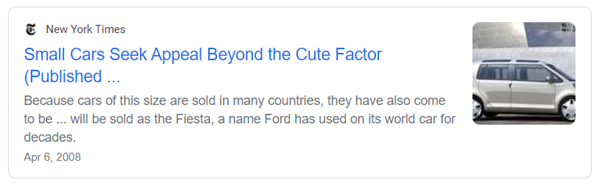

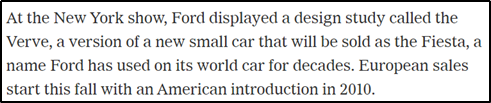
<center>
*Ref: https://www.nytimes.com/2008/04/06/automobiles/06SMALL.html

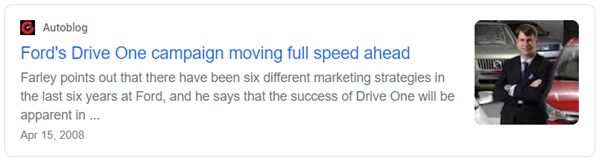
<center>
*Ref: https://www.autoblog.com/2008/04/15/fords-drive-one-campaign-moving-full-speed-ahead/

### Honda:
The brand is perceived positively with Okay with interior, Okay with performance, Okay with Price, Okay with Size, Okay with Transmission.

<br><b>A.	Product Manager: </b> Our brand and products are among the popular ones, and our products demonstrate a balanced mix of attributes, making our products the definition of “daily commuter” and popular, “mass-production” cars. Thus, we need better products which focus more on certain attributes and cater to certain audience.

<b>B.	Marketing/Advertising Manager:</b> Although being balanced out in the attributes boosts sales, this might also harm the company’s image in the long-term as being “average”. Thus, we need products which can help break this brand image by launching a few products which also cater towards a certain cluster of customers (e.g. Performance-oriented cars for younger population).

Matching Results with Data from the period 2007-08, which resonate with our recommendations:
 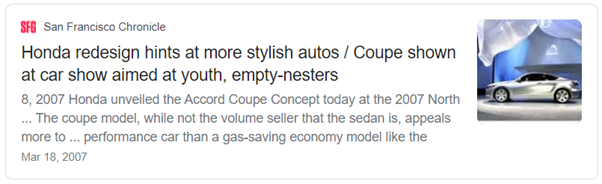
 <center>
 *Ref: https://www.sfgate.com/cars/article/Honda-redesign-hints-at-more-stylish-autos-2569257.php      

### Hyundai:
The brand is perceived positively with Interior and Price.
<br>The brand is not perceived positively with Performance and Transmission. (as compared to other companies in Top 5)
<br>Hyundai has a lift ratio of 0.790980 with Transmission. Typically, a lift ratio of less than 1 proposes that the two terms show up together not exactly (more than) one would expect by the simple event of every one of the two terms in the discussion independently. Thus, we cannot make any concrete comments about Hyundai’s transmission. 

<br><b> A. Product Manager: </b>
Our products are well received by the customers as reasonably-priced and people tend to like our interiors better than the competitors. However, the products are not well-perceived in terms of performance. Thus, we should fix this issue and deliver a better product, which is more performance-oriented.
<br><b>B. Marketing/Advertising Manager:</b> Since, our brand is perceived as an affordable one we can leverage this brand image and overcome our shortcomings by launching new products which lie at the intersection of performance and “value-for-money” domains. 

Matching Results with Data from the period 2007-08, which resonate with our recommendations:
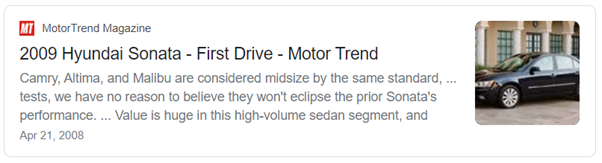
<center>
*Ref: https://www.autoblog.com/2008/02/06/chicago-2008-hyundai-officially-releases-the-2009-sonata/

### Mazda:
The brand is perceived positively with Interior, Performance, Price, Size and Transmission. 

<br><b>A.	Product Manager:</b> Our products are perceived as reasonably-priced, high-performance cars with a wide range of transmissions available. Thus, the products should be aimed to maintain and further bolster this perception. 

<b>B.	Marketing/Advertising Manager:</b>  Since, the products produced are top-notch and better than the competition, special attention must be paid to market the products against already existing market leaders. This can be done by becoming the consistent market leader in certain attributes, such as “Performance” and “Price”. Target marketing on younger population which are more likely to be potential customers considering their sensitivity to “Performance” and “Price”

Matching Results with Data from the period 2007-08, which resonate with our recommendations:
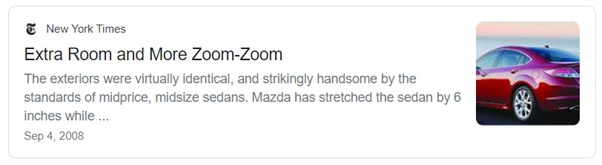 
<center>
    Ref: https://www.nytimes.com/2008/09/07/automobiles/autoreviews/07AUTO.html

### Toyota:
The brand is perceived positively with Size. 
<br>The brand is NOT perceived positively with performance and transmission. (as compared to other companies in Top 5)
<br>Toyota has a lift ratio of 0.963588 with Transmission. Typically, a lift ratio of less than 1 proposes that the two terms show up together not exactly (more than) one would expect by the simple event of every one of the two terms in the discussion independently. Thus, we cannot make any concrete comments about Hyundai’s transmission. 

<br><b>A. Product Manager: </b>Our cars are perceived to be appropriately-sized since they are designed with an intention of being a “family-car”. Thus, our products have enough boot space and leg room which contribute to the perception. This also leads to a perception that it has lower performance as compared to other brands, which focus more on “performance”. Thus, we should focus on building a product which is a sportier-version of the same product.

<b>B. Marketing/Advertising Manager: </b>Since, our products are perceived in positive light in most attributes, we would need to run massive ad-campaigns to make the customers aware of our product’s capabilities.


# Task E: 

### Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

The approach that we followed to determine the aspirational brand was to create a list of aspirational words. Some of these words included wish, hope, want, etc.  Then lift ratios between these words and all the brands were generated to see if a particular word was primarily associated with any brand. To find the most aspirational brand, all the words in the list were substituted as 'aspiration' in the comments.Then the lift ratios between the term 'aspiration' and all the brands were generated. 

As it can be seen below, Volvo had the highest lift ratio with the aspirational words followed by Audi and Mercedes. If we analyze the lift ratios of Volvo with aspirational words, it was mostly associated with: afford, fancy, choice, like, hope, need, prefer, and want. In fact, Volvo and the word 'fancy' had the highest lift ratio of 10.23, which further demonstrates Volvo is the brand that people want to own or buy. 

This analysis can be extremely helpful for Volvo as it can be seen that people aspire to own a vehicle from their brand. 
However, this might just be an aspiration due to superior brand image, without any intent to buy the actual product due to other factors such as budget constraints, maintenance and insurance charges, taxes etc.
Thus, an additional analysis needs to be performed to determine the potential market and forecast expected revenue to check feasibility of launching a lower-specification product which caters to these potential customers without compromising the company standards and brand image. Furthermore, we would need detailed analysis from more such forums to have a clear understanding of the factors that are significantly responsible for brand aspiration.

### Lift ratios for each aspirational word and brand 

In [27]:
asp = ["hope","choice", "prefer","want","dream","wish","desire","aspire","lean","incline","fancy","crave","need","eager","like","fond","afford","love"]
df_lift_brand_asp=pd.DataFrame(columns=['brand','aspiration','lift'])

i=0
for brand in brands:
    for aspire in asp:
        asp_lift = calc_lift(str(brand), str(aspire), df2.comments_unique)
        df_lift_brand_asp.loc[i]=[str(brand),str(aspire),asp_lift]
        i=i+1

df6 = df_lift_brand_asp.sort_values('lift',ascending = False).groupby('brand').head(10)
lift_matrix_asp_brand = df6.pivot(index='brand', columns='aspiration')
print(lift_matrix_asp_brand)

                lift                                                           \
aspiration    afford aspire    choice     crave    desire     dream     eager   
brand                                                                           
acura       0.000000    NaN  2.543611       NaN       NaN  0.000000       NaN   
audi             NaN    0.0  2.316814       NaN       NaN       NaN       NaN   
bmw         4.276361    NaN  1.847067       NaN  2.185696  4.917815  6.557087   
buick       3.316628    NaN  2.148801       NaN       NaN       NaN       NaN   
cadillac    4.937253    NaN       NaN       NaN       NaN       NaN       NaN   
chevrolet   2.329642    NaN  1.383567       NaN  1.488382       NaN       NaN   
chrysler    1.690577    NaN  1.004028       NaN  1.080091       NaN       NaN   
dodge       2.251183    NaN  1.701598       NaN       NaN       NaN       NaN   
ford        1.213626    NaN  1.485220  4.652235  1.292287  1.453823  2.326117   
honda       1.450865    NaN 

Lift ratio between the term 'aspirational' and all the brands

In [28]:
## Function to replace the aspirational phrases with the word - "aspiration

# Replacing all aspiration words with term 'aspiration'
df7 = df2.copy(deep = True)
for i in range(len(df7)):
    n = len(df7['comments_unique'][i])
    for j in range(n):
        word = df7['comments_unique'][i][j]
        if word in asp:
            df7['comments_unique'][i][j] = 'aspiration'


def calc_lift_asp(a,b, comments):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(comments)
    if a==b:
        return 1
    for i in comments:
        if a in i:
            num_a += 1
        if a in i and b in i:
            num_a_b += 1
        if b in i:
            num_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)
    
    
df_lift_brand_aspiration =pd.DataFrame(columns=['brand','lift'])
i=0

for brand in brands:
    aspiration_lift=calc_lift_asp(str(brand),'aspiration', df7.comments_unique)
    df_lift_brand_aspiration.loc[i]=[ str(brand),aspiration_lift]
    i=i+1

df8 = df_lift_brand_aspiration.sort_values('lift',ascending = False).groupby('brand').head(10)
print(df8.sort_values(by = 'lift',ascending=False))

         brand      lift
25       volvo  1.691354
1         audi  1.546679
15    mercedes  1.508371
21      subaru  1.485712
2          bmw  1.470025
11    infiniti  1.412482
16     mercury  1.406017
0        acura  1.361428
24  volkswagen  1.350198
18      nissan  1.324240
14       mazda  1.321958
3        buick  1.312628
17  mitsubishi  1.304331
20      saturn  1.300789
10     hyundai  1.240963
5    chevrolet  1.238123
19     pontiac  1.202112
23      toyota  1.197691
9        honda  1.193855
12         kia  1.176710
8         ford  1.156197
6     chrysler  1.137441
4     cadillac  1.116586
22      suzuki  1.105420
7        dodge  1.081874
13     lincoln  0.958630
